In [ ]:
key = input("Enter your key")

In [ ]:
import requests

In [ ]:
limit = input("enter max results")
videoId = input("enter video id")
googleApi = 'https://www.googleapis.com/youtube/v3/commentThreads?part=snippet&maxResults='+limit+'&videoId='+videoId+'&key='+key


In [ ]:
googleApi

In [ ]:
page_info = requests.get(googleApi)

In [28]:
page_info

<Response [200]>

In [29]:
comments = page_info.json()
comments

{'kind': 'youtube#commentThreadListResponse',
 'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/NtmtuLNE4u9cqpcUKzoNwyo59wc"',
 'nextPageToken': 'QURTSl9pMGlSb2tNN3ZpMXhGNFE5N1dTZ3h0LTR1VGdKYVZJelNMWVNOeFZEQmtSc2ZYTmtjdm50aF9WaEtMTlg2R0hRdXZVMHFHdW1ZaHVnQ0FVNWx4WG5tNktvaUdyMUZvb0xmTDlLQlNZdXR2Nmc3blo2UkNPTV9NSHg5OTY=',
 'pageInfo': {'totalResults': 10, 'resultsPerPage': 10},
 'items': [{'kind': 'youtube#commentThread',
   'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/YbiI0JhrvQRlZgtQ_5aL6VVbK2A"',
   'id': 'Ugzpo5ksOjkrXI4UuLJ4AaABAg',
   'snippet': {'videoId': 'BadBAMnPX0I',
    'topLevelComment': {'kind': 'youtube#comment',
     'etag': '"XpPGQXPnxQJhLgs6enD_n8JR4Qk/p-dzbeQODaZ5ZCIyWSAIDKN80-o"',
     'id': 'Ugzpo5ksOjkrXI4UuLJ4AaABAg',
     'snippet': {'authorDisplayName': 'Lilith Vegan Batgirl',
      'authorProfileImageUrl': 'https://yt3.ggpht.com/-dePUOshQr38/AAAAAAAAAAI/AAAAAAAAAAA/Q-5g0AMm5Qw/s28-c-k-no-mo-rj-c0xffffff/photo.jpg',
      'authorChannelUrl': 'http://www.youtube.com/channel/UCxOFDZL

In [30]:
for comment in comments['items']:
    print(comment['snippet']['topLevelComment']['snippet']['textOriginal'])

❤️❤️❤️Love it
Akshaye khanna is resemble mstly saif ali khan
This song will never getting old 😍😍
Nice
Anyone here's February 2019...
Arijit singh
Feb 14 2019💘❤
Nice song
❤️❤️❤️❤️
❤️❤️❤️❤️


In [31]:
unfiltered_comments = []
for comment in comments['items']:
    unfiltered_comments.append(comment['snippet']['topLevelComment']['snippet']['textOriginal'])
print(unfiltered_comments)

['❤️❤️❤️Love it', 'Akshaye khanna is resemble mstly saif ali khan', 'This song will never getting old 😍😍', 'Nice', "Anyone here's February 2019...", 'Arijit singh', 'Feb 14 2019💘❤', 'Nice song', '❤️❤️❤️❤️', '❤️❤️❤️❤️']


In [32]:
import nltk
nltk.download('punkt')
import pandas as pd
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
from nltk.tokenize import word_tokenize
tokenized_text = ' '.join(word for word in unfiltered_comments)
tokenized_word = word_tokenize(tokenized_text)
tokenized_word

['❤️❤️❤️Love',
 'it',
 'Akshaye',
 'khanna',
 'is',
 'resemble',
 'mstly',
 'saif',
 'ali',
 'khan',
 'This',
 'song',
 'will',
 'never',
 'getting',
 'old',
 '😍😍',
 'Nice',
 'Anyone',
 'here',
 "'s",
 'February',
 '2019',
 '...',
 'Arijit',
 'singh',
 'Feb',
 '14',
 '2019💘❤',
 'Nice',
 'song',
 '❤️❤️❤️❤️',
 '❤️❤️❤️❤️']

In [34]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
removing_emojis = tokenizer.tokenize(tokenized_text)
removing_emojis

['Love',
 'it',
 'Akshaye',
 'khanna',
 'is',
 'resemble',
 'mstly',
 'saif',
 'ali',
 'khan',
 'This',
 'song',
 'will',
 'never',
 'getting',
 'old',
 'Nice',
 'Anyone',
 'here',
 's',
 'February',
 '2019',
 'Arijit',
 'singh',
 'Feb',
 '14',
 '2019',
 'Nice',
 'song']

In [35]:
from nltk.probability import FreqDist
fdist = FreqDist(removing_emojis)
print(fdist)
fdist.most_common(2)

<FreqDist with 26 samples and 29 outcomes>


[('song', 2), ('Nice', 2)]

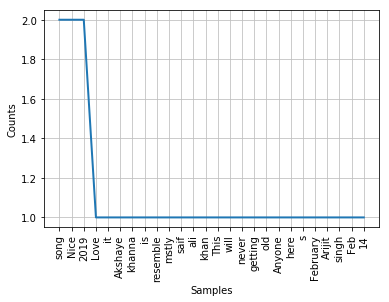

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### removing stopwords

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
filtered_words=[]
for words in removing_emojis:
    if words not in stop_words:
        filtered_words.append(words)

print("Filterd words:",filtered_words)
print(len(filtered_words))

Filterd words: ['Love', 'Akshaye', 'khanna', 'resemble', 'mstly', 'saif', 'ali', 'khan', 'This', 'song', 'never', 'getting', 'old', 'Nice', 'Anyone', 'February', '2019', 'Arijit', 'singh', 'Feb', '14', '2019', 'Nice', 'song']
24


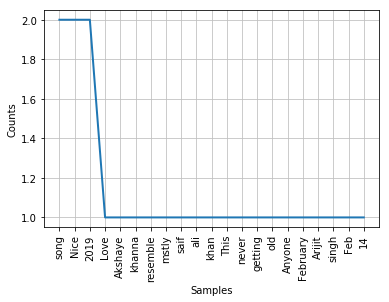

In [39]:
fdist = FreqDist(filtered_words)
fdist.plot(30,cumulative=False)
plt.show()

In [40]:
print(len(set(filtered_words)))
set(filtered_words)

21


{'14',
 '2019',
 'Akshaye',
 'Anyone',
 'Arijit',
 'Feb',
 'February',
 'Love',
 'Nice',
 'This',
 'ali',
 'getting',
 'khan',
 'khanna',
 'mstly',
 'never',
 'old',
 'resemble',
 'saif',
 'singh',
 'song'}

### Stemming v/s Lemmatization

### Stemming

In [41]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

stemmed_words=[]
for word in filtered_words:
    stemmed_words.append(ps.stem(word))
    
print("Stemmed Words:",stemmed_words)

Stemmed Words: ['love', 'akshay', 'khanna', 'resembl', 'mstli', 'saif', 'ali', 'khan', 'thi', 'song', 'never', 'get', 'old', 'nice', 'anyon', 'februari', '2019', 'arijit', 'singh', 'feb', '14', '2019', 'nice', 'song']


### Lemmatization

In [42]:
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
lem = WordNetLemmatizer()

lemmatized_words = []
for word in filtered_words:
    lemmatized_words.append(lem.lemmatize(word,"v"))
    
print("Lemmatized Words:",lemmatized_words)

Lemmatized Words: ['Love', 'Akshaye', 'khanna', 'resemble', 'mstly', 'saif', 'ali', 'khan', 'This', 'song', 'never', 'get', 'old', 'Nice', 'Anyone', 'February', '2019', 'Arijit', 'singh', 'Feb', '14', '2019', 'Nice', 'song']


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### POS Tagging

In [43]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokenized_word)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PRATEEK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('❤️❤️❤️Love', 'VB'),
 ('it', 'PRP'),
 ('Akshaye', 'NNP'),
 ('khanna', 'NN'),
 ('is', 'VBZ'),
 ('resemble', 'JJ'),
 ('mstly', 'RB'),
 ('saif', 'VBP'),
 ('ali', 'RB'),
 ('khan', 'VB'),
 ('This', 'DT'),
 ('song', 'NN'),
 ('will', 'MD'),
 ('never', 'RB'),
 ('getting', 'VBG'),
 ('old', 'JJ'),
 ('😍😍', 'JJ'),
 ('Nice', 'NNP'),
 ('Anyone', 'NNP'),
 ('here', 'RB'),
 ("'s", 'VBZ'),
 ('February', 'NNP'),
 ('2019', 'CD'),
 ('...', ':'),
 ('Arijit', 'NNP'),
 ('singh', 'VBD'),
 ('Feb', 'NNP'),
 ('14', 'CD'),
 ('2019💘❤', 'CD'),
 ('Nice', 'NNP'),
 ('song', 'NN'),
 ('❤️❤️❤️❤️', 'NN'),
 ('❤️❤️❤️❤️', 'NN')]

## Sentiment Analysis using Machine learning

## Multi-Nomial Naive Bayes Classification 

### 0 - negative 1 - somewhat negative 2 - neutral 3 - somewhat positive 4 - positive

In [45]:
data=pd.read_csv('train.tsv', sep='\t')

In [46]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [48]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [49]:
Sentiment_count=data.groupby('Sentiment').count()
Sentiment_count

,PhraseId,SentenceId,Phrase
Sentiment,,,
0,7072,7072,7072
1,27273,27273,27273
2,79582,79582,79582
3,32927,32927,32927
4,9206,9206,9206


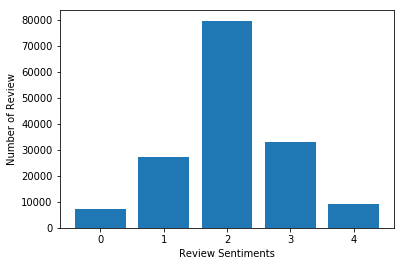

In [50]:
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()